In [224]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [225]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [226]:
len(words)

32033

In [227]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


So we are making the dataset now

Always taking a word and padding it with dots. And then predicting the next token.

In [228]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [229]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [230]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In the paper they cram 17.000 words or so into only 30 dimensional space.

We only have 27 charachters, so let's cram them into a 2 d space.

In [231]:
C = torch.randn((27, 2))

In [232]:
C

tensor([[-0.8354,  0.9031],
        [-1.2356,  0.1891],
        [-0.6765,  1.5545],
        [ 1.1454, -2.2686],
        [-1.9261, -1.1567],
        [-0.3916,  0.4943],
        [ 0.0401, -0.7610],
        [ 0.5231, -0.5392],
        [-1.6792,  1.0800],
        [ 0.2936, -1.5681],
        [-1.5461, -0.2493],
        [-0.0220, -0.1858],
        [-1.1093,  0.8735],
        [ 1.1753, -0.1000],
        [ 0.3326,  1.2803],
        [ 0.6752,  0.7126],
        [ 0.4712, -1.2940],
        [ 0.0471, -0.1651],
        [-1.6524, -0.2571],
        [-0.0717, -0.8356],
        [-1.0112,  0.6868],
        [ 0.4297, -0.5105],
        [ 0.4904,  1.0272],
        [ 0.7424,  0.4719],
        [ 0.4074,  0.2533],
        [-0.7838,  0.2627],
        [ 0.5227,  0.0750]])

We could just set 5 to be `C[5]`

In [233]:
C[5]

tensor([-0.3916,  0.4943])

In [234]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.3916,  0.4943])

If we do this it's exactly identical to what we did before. Because of how matrix mult. works.

We could think of this as the first layer of the NN

But we are actually going to use the normal way, not the one hot, that just is not needed here.

In [235]:
C[X]

tensor([[[-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031]],

        [[-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.3916,  0.4943]],

        [[-0.8354,  0.9031],
         [-0.3916,  0.4943],
         [ 1.1753, -0.1000]],

        [[-0.3916,  0.4943],
         [ 1.1753, -0.1000],
         [ 1.1753, -0.1000]],

        [[ 1.1753, -0.1000],
         [ 1.1753, -0.1000],
         [-1.2356,  0.1891]],

        [[-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031]],

        [[-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [ 0.6752,  0.7126]],

        [[-0.8354,  0.9031],
         [ 0.6752,  0.7126],
         [-1.1093,  0.8735]],

        [[ 0.6752,  0.7126],
         [-1.1093,  0.8735],
         [ 0.2936, -1.5681]],

        [[-1.1093,  0.8735],
         [ 0.2936, -1.5681],
         [ 0.4904,  1.0272]],

        [[ 0.2936, -1.5681],
         [ 0.4904,  1.0272],
         [ 0.2936, -1.5681]],

        [[ 0.4904,  1

In [236]:
C[X].shape

torch.Size([32, 3, 2])

In [237]:
emb = C[X]

In [238]:
emb.shape

torch.Size([32, 3, 2])

## Creating first hidden layer of NN

because there are 3 * 2 dimensions the inputs are 6

In [239]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

We can't just do `emb @ Wa + b1` or something like that because the dimensions don't check out. We have to concatenate something.

32 * 3 * 2 needs to be 32 * 6

In [240]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1)

tensor([[-0.8354,  0.9031, -0.8354,  0.9031, -0.8354,  0.9031],
        [-0.8354,  0.9031, -0.8354,  0.9031, -0.3916,  0.4943],
        [-0.8354,  0.9031, -0.3916,  0.4943,  1.1753, -0.1000],
        [-0.3916,  0.4943,  1.1753, -0.1000,  1.1753, -0.1000],
        [ 1.1753, -0.1000,  1.1753, -0.1000, -1.2356,  0.1891],
        [-0.8354,  0.9031, -0.8354,  0.9031, -0.8354,  0.9031],
        [-0.8354,  0.9031, -0.8354,  0.9031,  0.6752,  0.7126],
        [-0.8354,  0.9031,  0.6752,  0.7126, -1.1093,  0.8735],
        [ 0.6752,  0.7126, -1.1093,  0.8735,  0.2936, -1.5681],
        [-1.1093,  0.8735,  0.2936, -1.5681,  0.4904,  1.0272],
        [ 0.2936, -1.5681,  0.4904,  1.0272,  0.2936, -1.5681],
        [ 0.4904,  1.0272,  0.2936, -1.5681, -1.2356,  0.1891],
        [-0.8354,  0.9031, -0.8354,  0.9031, -0.8354,  0.9031],
        [-0.8354,  0.9031, -0.8354,  0.9031, -1.2356,  0.1891],
        [-0.8354,  0.9031, -1.2356,  0.1891,  0.4904,  1.0272],
        [-1.2356,  0.1891,  0.4904,  1.0

In [241]:
torch.unbind(emb, 1)

(tensor([[-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.3916,  0.4943],
         [ 1.1753, -0.1000],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [ 0.6752,  0.7126],
         [-1.1093,  0.8735],
         [ 0.2936, -1.5681],
         [ 0.4904,  1.0272],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-1.2356,  0.1891],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [ 0.2936, -1.5681],
         [-0.0717, -0.8356],
         [-1.2356,  0.1891],
         [-0.6765,  1.5545],
         [-0.3916,  0.4943],
         [-1.1093,  0.8735],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0.0717, -0.8356],
         [ 0.6752,  0.7126],
         [ 0.4712, -1.2940],
         [-1.6792,  1.0800]]),
 tensor([[-0.8354,  0.9031],
         [-0.8354,  0.9031],
         [-0

A better way to concatenate is

In [242]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [243]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

doing this is super efficient, so ideally we do it that way.

In [244]:
emb.view(32,6)

tensor([[-0.8354,  0.9031, -0.8354,  0.9031, -0.8354,  0.9031],
        [-0.8354,  0.9031, -0.8354,  0.9031, -0.3916,  0.4943],
        [-0.8354,  0.9031, -0.3916,  0.4943,  1.1753, -0.1000],
        [-0.3916,  0.4943,  1.1753, -0.1000,  1.1753, -0.1000],
        [ 1.1753, -0.1000,  1.1753, -0.1000, -1.2356,  0.1891],
        [-0.8354,  0.9031, -0.8354,  0.9031, -0.8354,  0.9031],
        [-0.8354,  0.9031, -0.8354,  0.9031,  0.6752,  0.7126],
        [-0.8354,  0.9031,  0.6752,  0.7126, -1.1093,  0.8735],
        [ 0.6752,  0.7126, -1.1093,  0.8735,  0.2936, -1.5681],
        [-1.1093,  0.8735,  0.2936, -1.5681,  0.4904,  1.0272],
        [ 0.2936, -1.5681,  0.4904,  1.0272,  0.2936, -1.5681],
        [ 0.4904,  1.0272,  0.2936, -1.5681, -1.2356,  0.1891],
        [-0.8354,  0.9031, -0.8354,  0.9031, -0.8354,  0.9031],
        [-0.8354,  0.9031, -0.8354,  0.9031, -1.2356,  0.1891],
        [-0.8354,  0.9031, -1.2356,  0.1891,  0.4904,  1.0272],
        [-1.2356,  0.1891,  0.4904,  1.0

In [245]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [246]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [247]:
h.shape

torch.Size([32, 100])

In [248]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [249]:
logits = h @ W2 + b2

In [250]:
logits.shape

torch.Size([32, 27])

In [251]:
counts = logits.exp()

In [252]:
prob = counts / counts.sum(1, keepdims = True)

In [253]:
prob.shape

torch.Size([32, 27])

In [254]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(16.2153)

## Making the NN loss more respectable

There is a function to calculate the cross entropy so no need to do it ourselves

In [255]:
F.cross_entropy(logits, Y)

tensor(16.2153)

In [256]:
parameters = [C, W1,b1, W2,b2]

In [257]:
for p in parameters:
    p.requires_grad = True

In [258]:
for i in range(10):

  # forward pass
  emb = C[X] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += - 0.1 * p.grad

16.215288162231445
13.700180053710938
11.800699234008789
10.205259323120117
8.542738914489746
7.5017266273498535
6.704432964324951
6.059825420379639
5.439170837402344
4.910754203796387


# Until here now this is the basic NN one can make, 

In [259]:
torch.randint(0, X.shape[0], (32,))

tensor([ 6, 23, 23, 29, 10, 30, 19, 12, 24,  3, 21,  0,  0,  9,  7, 24,  9, 24,
         3,  6, 17, 29, 20,  6,  7, 31, 31,  9, 30,  7, 29, 18])

In [260]:
for i in range(100):

  # minibatch
  xi = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[xi]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[xi])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += - 0.0001 * p.grad

  print(loss.item())


5.357973575592041
3.978724241256714
4.271456241607666
3.9860501289367676
4.220369338989258
4.290560245513916
2.9173519611358643
3.515964984893799
4.165951251983643
4.441980838775635
4.0147247314453125
5.567392349243164
3.160198926925659
5.121642589569092
4.4479899406433105
5.1097612380981445
3.5722954273223877
5.719076156616211
5.3708930015563965
3.6626055240631104
5.095433712005615
4.8526716232299805
4.049042701721191
3.504216194152832
5.268301010131836
4.003218173980713
6.381800174713135
5.019685745239258
3.783850908279419
4.156115531921387
4.916520118713379
4.970744609832764
4.070123195648193
4.506397247314453
5.311676025390625
3.4245574474334717
3.1322553157806396
5.592556953430176
4.152181148529053
3.3318848609924316
4.758646488189697
4.385451793670654
5.585689067840576
5.3094916343688965
4.215263366699219
4.8872504234313965
6.542144298553467
4.744100093841553
3.2295100688934326
3.2421140670776367
4.324875354766846
4.9579386711120605
4.808131694793701
4.949362754821777
2.848406076

At the moment were't fitting only 32 examples with 3000 parameters or so so it's overfitting.

In [261]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

## Finding a good learning rate


In [262]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

Making everything easyer to reset

In [276]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [278]:
for p in parameters:
    p.requires_grad = True

In [292]:
lri = []
lossi = []


for i in range(10000):

  # minibatch
  xi = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[xi]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[xi])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += - lr * p.grad

  #track stats
  #lri.append(lr)
  #lossi.append(loss.item())

print(loss.item())


2.434281587600708


In [293]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3312, grad_fn=<NllLossBackward0>)

The result we're getting in the end is $2.3312$

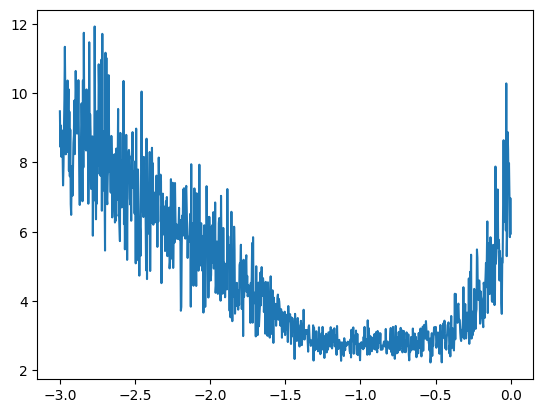

In [268]:
plt.plot(lre,lossi)

## Doing validation and testing

One might split into 
training split, validation split, test split
80%, 10%, 10%

You're only allowed to use the test split occaisonally not too often

In [294]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [295]:
len(words)

32033

In [296]:
n1

25626

In [297]:
n2

28829

Resitting everything

In [314]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [315]:
for p in parameters:
    p.requires_grad = True

Now using different sets

In [330]:
lri = []
lossi = []
stepi = []


for i in range(10000):

  # minibatch
  xi = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[xi]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[xi])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += - lr * p.grad

  #track stats
  stepi.append(i)
  lossi.append(loss.item())

print(loss.item())


2.3273696899414062


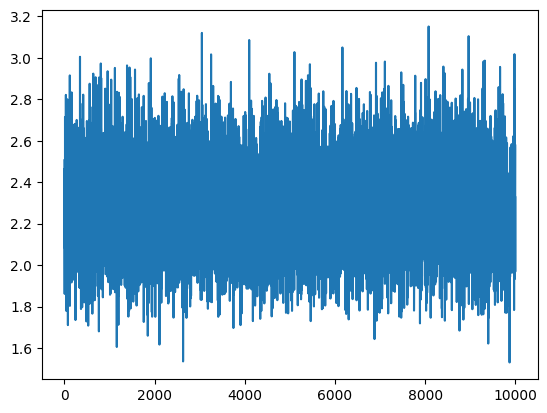

In [331]:
plt.plot(stepi,lossi)

In [332]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2786, grad_fn=<NllLossBackward0>)

Training and test error are very similar so we are under fitting so make model larger.

In [333]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2809, grad_fn=<NllLossBackward0>)

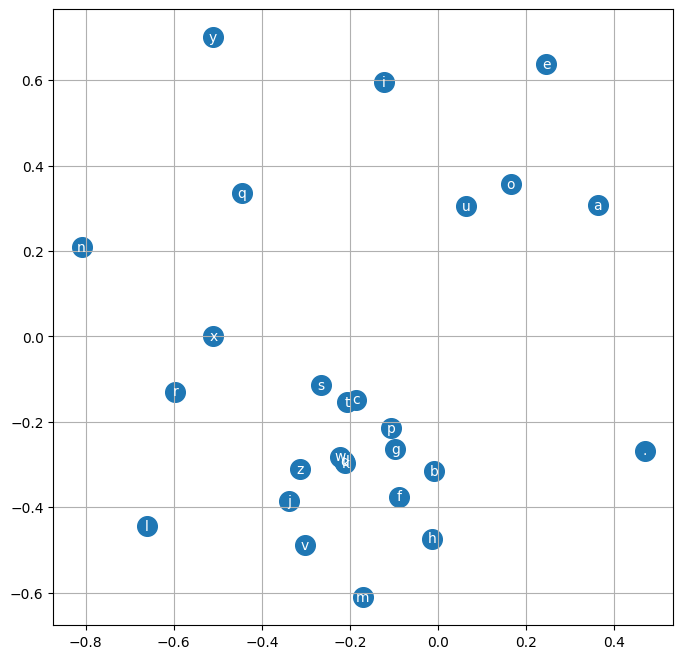

In [334]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

## Larger embedding space

In [338]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 150), generator=g)
b1 = torch.randn(150, generator=g)
W2 = torch.randn((150, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [340]:
lri = []
lossi = []
stepi = []


In [350]:


for i in range(30000):

  # minibatch
  xi = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[xi]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[xi])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += - lr * p.grad

  #track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())


1.947399616241455


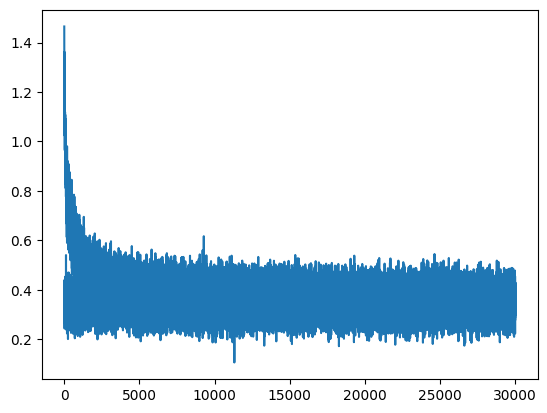

In [351]:
plt.plot(stepi, lossi)

In [352]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2230, grad_fn=<NllLossBackward0>)

In [353]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2371, grad_fn=<NllLossBackward0>)

In [354]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
mayah.
seevend.
rylle.
emmaslendrlee.
adered.
elin.
shy.
jen.
edellean.
nar.
kayzior.
kalin.
shuthrishimiel.
kinde.
jelipenterian.
bewander.
yayleyehs.
kay.
myanny.
